In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
im = Image.open('image1.jpg').convert('L')
img = np.array(im)

In [3]:
def image_to_graph(img):
    G = nx.grid_2d_graph(img.shape[0], img.shape[1])
    G.graph['X'] = img.shape[0]
    G.graph['Y'] = img.shape[1]
    nx.set_node_attributes(G,{u:{'intensity':v} for u,v in np.ndenumerate(img)})
    for u, v, d in G.edges(data = True):
        d['weight'] = abs(np.subtract(img[u], img[v]))
    return G

In [19]:
def graph_to_image(G):
    intensity = nx.get_node_attributes(G,'intensity')
    I = np.zeros((G.graph['X'], G.graph['Y']), dtype=np.int8)
    for node,value in intensity.items():
        I[node[0]][node[1]] = value
    return Image.fromarray(I,mode='P')

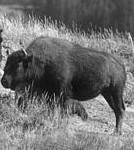

In [20]:
G = image_to_graph(img)
Image.fromarray(np.array(img))

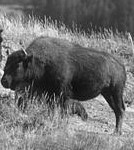

In [21]:
graph_to_image(G)

array([[ 89,  94,  99, ...,  80,  85,  86],
       [ 92,  95, 100, ...,  79,  84,  86],
       [ 89,  91,  95, ...,  77,  82,  85],
       ...,
       [153, 140, 167, ..., 165, 126, 137],
       [142, 125, 161, ..., 178, 131, 136],
       [146, 128, 166, ..., 164, 134, 119]], dtype=uint8)

In [8]:
A[0][1]

NameError: name 'A' is not defined